# How to Visualize Your Results?
Guorui Shen, guorui233@outlook.com

Jul 2, 2019

## 1 - Visualize Curves

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # projection='3d'
import scipy.io as sio

In [2]:
lrz = sio.loadmat('Lorenz.mat')
data, t = lrz['states'], lrz['t'][0]
print(data.shape, t.shape)

((6000, 3), (6000,))


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


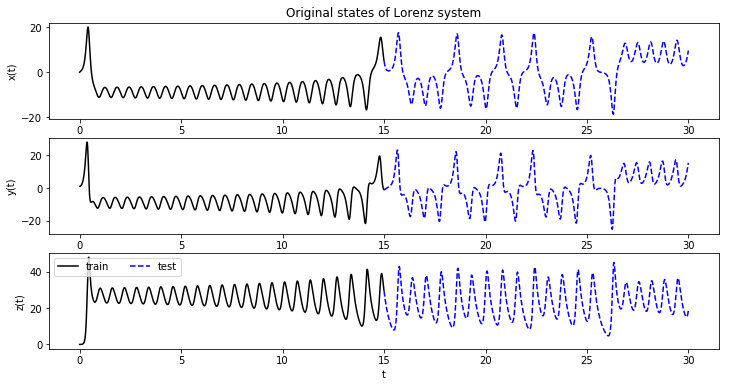

In [3]:
ylabel = ['x(t)', 'y(t)', 'z(t)']
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.title('Original states of Lorenz system')
for i in range(3):
    plt.subplot(311+i)
    plt.plot(t[:3000], data[:3000, i], 'k-', t[3000:], data[3000:, i], 'b--')
    plt.ylabel(ylabel[i])
plt.xlabel('t')
plt.legend(['train', 'test'], loc = 0, ncol = 2)

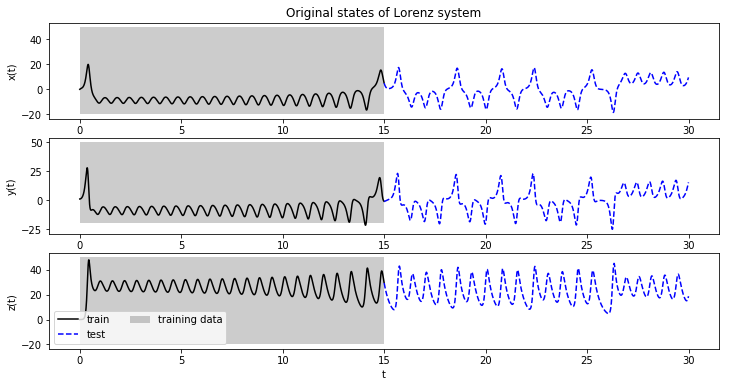

In [4]:
ylabel = ['x(t)', 'y(t)', 'z(t)']
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.title('Original states of Lorenz system')
for i in range(3):
    plt.subplot(311+i)
    plt.plot(t[:3000], data[:3000, i], 'k-', t[3000:], data[3000:, i], 'b--')
    plt.fill([t[0], t[0], t[2999], t[2999]], [-20, 50, 50, -20], fc='black', alpha=0.2, label='training data')
    plt.ylabel(ylabel[i])
plt.xlabel('t')
plt.legend(["train", "test", "training data"], loc='lower left', ncol=2)

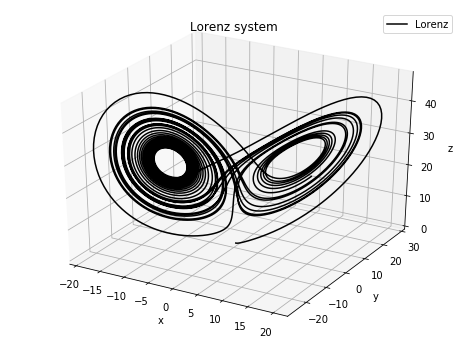

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot(data[:,0], data[:,1], data[:,2], 'k-', label='Lorenz')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz system')
ax.legend()
plt.show()

## 2 - Visualize Surface

In [6]:
from matplotlib import cm # 3D surface color
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # projection='3d'
import scipy.io as sio
import numpy as np

In [7]:
ks = sio.loadmat('KS.mat')
data, x, t = ks['uu'], ks['x'][:, 0], ks['tt'][0]
print(data.shape, x.shape, t.shape)

((801, 128), (128,), (801,))


(801, 128)


/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:959: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


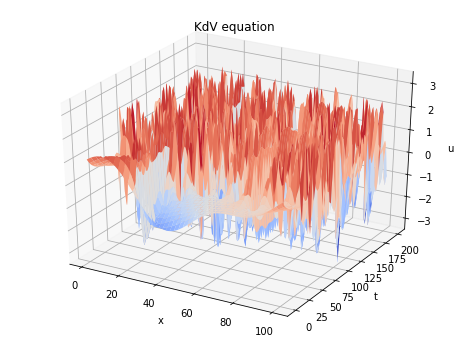

In [8]:
plt.figure(figsize=(8, 6))
fig = plt.subplot(111)
ax = plt.gca(projection='3d')
X, T = np.meshgrid(x, t)
print(X.shape)
surf = ax.plot_surface(X, T, data, cmap=cm.coolwarm) # cmap = 'viridis'
ax.set_title('KdV equation')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

((128, 801), (128, 801), (128, 801))


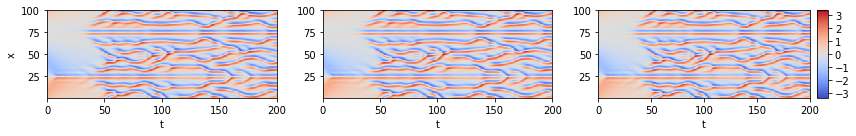

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar

vmin, vmax = data.min(), data.max()
T, X = np.meshgrid(t, x)
print(T.shape, X.shape, data.T.shape)

fig = plt.figure(figsize=(12, 2))
ax_actual = fig.add_subplot(131)
ax_actual.set_ylabel('x')
ax_actual.set_xlabel('t')
mesh_actual = ax_actual.pcolormesh(T, X, data.T, cmap = cm.coolwarm)
mesh_actual.set_clim(vmin,vmax)

ax_predict = fig.add_subplot(132)
ax_predict.set_xlabel('t')
mesh_predict = ax_predict.pcolormesh(T, X, data.T, cmap = cm.coolwarm)
mesh_predict.set_clim(vmin,vmax)

ax_error = fig.add_subplot(133)
mesh_error = ax_error.pcolormesh(T, X, data.T, cmap = cm.coolwarm)
ax_error.set_xlabel('t')
mesh_error.set_clim(vmin,vmax)

divider = make_axes_locatable(ax_error)
cax_val = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mesh_error, ax=ax_error, cax=cax_val)
fig.tight_layout()
plt.show()